<a href="https://colab.research.google.com/github/Kggzzz/data_viz/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
from datetime import date,datetime,time
import io

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

path = '/content/drive/My Drive/Data_viz'


import os

Mounted at /content/drive


In [3]:
search_df = os.path.join(path,'search_request.csv')

In [4]:
data = pd.read_csv(search_df) 
data.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534


เตรียมข้อมูล 

In [6]:
data['search_timestamp']= pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors ='coerce') #เปลี่ยนข้อมูลให้เป็นTimestamp

## Bar chart (กราฟแท่ง)

กราฟผลไม้ 

สร้างกราฟแท่งเปรียบเทียบปริมาณคนเข้าใช้เว็ป Wongnai เพื่อค้นหาร้านอาหารในแต่ละวัน 

In [14]:
from matplotlib import pyplot as plt

<BarContainer object of 7 artists>

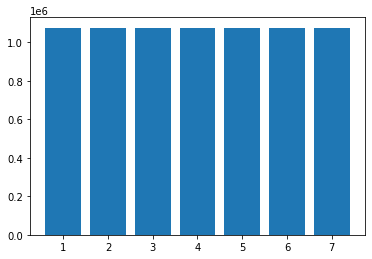

In [15]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek==0].iloc[:,2].count()])

In [7]:
top_table = data.iloc[:10,:]
top_table

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88
5,5,4c048ac7-9fc7-49e8-9ee4-20ff755b939d,2018-06-22 09:29:22.530,"Wongnai/10.0 (iPhone9,4; iOS; 11.4; en_TH@cale...",NaN,NaN,3u94dntbdh94a9ranr2t20ms9s,17,12.8531,101.109
6,6,3ecf13ba-be4d-4eb9-9374-a1cca09d1614,2018-06-22 11:26:40.836,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone8,4; iOS;...",ผัดไท,NaN,1m91ertp1g9a09agkl7dqtej30,17,12.4511,102.249
7,7,a7e6b7c5-3d3c-4337-8337-d29c5346b686,2018-06-22 09:19:42.950,"Wongnai/10.0 (iPhone10,5; iOS; 11.4; en_TH@cal...",NaN,21588.0,6r2me4445u8noal5ra1a9hrk67,12,13.6409,100.433
8,8,02fedb5c-c9cd-46d7-9354-7613ecb7cfdd,2018-06-22 12:22:17.031,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH@cal...",vt แหนมเนือง,6967.0,4db1ugh8nj95totfl6dd4q4rb9,14,13.7209,100.527
9,9,e215d487-0450-4794-830a-ecfc0ab6493b,2018-06-22 12:15:24.769,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH@cal...",kuppadeli,6967.0,4orpg6839u93baoa36aicq78iq,9,13.7208,100.527


In [8]:
Mon = top_table[top_table['search_timestamp'].dt.dayofweek == 0]
Tues = top_table[top_table['search_timestamp'].dt.dayofweek == 1]
Wed = top_table[top_table['search_timestamp'].dt.dayofweek == 2]
Thurs = top_table[top_table['search_timestamp'].dt.dayofweek == 3]
Fri = top_table[top_table['search_timestamp'].dt.dayofweek == 4]
Sat = top_table[top_table['search_timestamp'].dt.dayofweek == 5]
Sun = top_table[top_table['search_timestamp'].dt.dayofweek == 6]

In [27]:
Mon2 = data[data['search_timestamp'].dt.dayofweek == 0].count()

In [26]:
Tues2 = data[data['search_timestamp'].dt.dayofweek == 1].count()
Wed2 = data[data['search_timestamp'].dt.dayofweek == 2].count()
Thurs2 = data[data['search_timestamp'].dt.dayofweek == 3].count()
Fri2 = data[data['search_timestamp'].dt.dayofweek == 4].count()
Sat2 = data[data['search_timestamp'].dt.dayofweek == 5].count()
Sun2 = data[data['search_timestamp'].dt.dayofweek == 6].count()

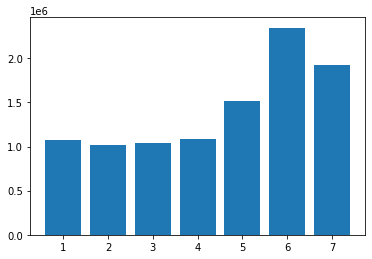

In [29]:
plt.bar([1,2,3,4,5,6,7],[Mon2.iloc[2],Tues2.iloc[2],Wed2.iloc[2],Thurs2.iloc[2],Fri2.iloc[2],Sat2.iloc[2],Sun2.iloc[2]]);